In [1]:
#######################################################
#######################################################
#######################################################

## Intro To Clustering: K Means - 4 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 2 of IntroToClustering - KMeans for Tasks 1-8
#### Task 1
##### Import the required packages.
##### Set the NumPy seed to 1234.
#### Result:


In [2]:
import os
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Setting random seed
np.random.seed(1234)



#### Task 2
##### Set `main_dir` to the main folder.
##### Set `data_dir` to the path of the data directory.
##### Print `main_dir` and `data_dir`.


#### Result:


In [3]:
# Set 'main_dir' to location of the project folder

home_dir = Path(".").resolve()

# Setting main directory 
main_dir = home_dir.parent.parent
print(main_dir)

# Setting data directory 
data_dir = str(main_dir) + "/data"
print(data_dir)




C:\
C:\/data


#### Task 3
##### Load the dataset `heart_failure_clinical_records_dataset.csv` and save it as `ex_df`.
##### Print the first few rows of `ex_df`.
#### Result:


In [4]:

# Load dataset
ex_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Print first few rows
print(ex_df.head())



    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  death_event  id  
0        0     4            1   1  
1        0     6            1   

#### Task 4


##### For clustering, we will be using just the  `['creatinine_phosphokinase', 'age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets']` columns. Drop all the other columns from `ex_df` and name the new dataset as `ex_df_cluster`. 


##### Print the first few rows of `ex_df_cluster` to make sure we have the correct dataset.


##### Check how many NAs are in each column and impute them with mean and check for NAs again.


#### Result:


In [5]:

# Subset to just have `['creatinine_phosphokinase', 'age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets']`.
ex_df_cluster = ex_df[['creatinine_phosphokinase', 'age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets']]

# Print first few rows
print(ex_df_cluster.head())

# Check for nulls
print(ex_df_cluster.isnull().sum())

# Impute NAs and check for nulls again
ex_df_cluster = ex_df_cluster.fillna(ex_df_cluster.mean())
print(ex_df_cluster.isnull().sum())



   creatinine_phosphokinase   age  time  serum_creatinine  ejection_fraction  \
0                       582  75.0     4               1.9                 20   
1                      7861  55.0     6               1.1                 38   
2                       146  65.0     7               1.3                 20   
3                       111  50.0     7               1.9                 20   
4                       160  65.0     8               2.7                 20   

   serum_sodium  platelets  
0           130  265000.00  
1           136  263358.03  
2           129  162000.00  
3           137  210000.00  
4           116  327000.00  
creatinine_phosphokinase    0
age                         0
time                        0
serum_creatinine            0
ejection_fraction           0
serum_sodium                0
platelets                   0
dtype: int64
creatinine_phosphokinase    0
age                         0
time                        0
serum_creatinine            0
ej

#### Task 5


##### In the dataset `ex_df_cluster`, check the data types for all of the columns. 
##### After making sure that all the data is numeric, scale the dataset and name it `ex_df_cluster_scaled`.
##### When the dataset is scaled, convert `ex_df_cluster_scaled` to a Pandas DataFrame named `ex_df_kmeans` and make sure to name the columns again. 


##### Print out the first few rows of `ex_df_kmeans` to make sure the column names are correct and are ready for clustering.


#### Result:


In [6]:

# Check data type of our variables.
print(ex_df_cluster.dtypes)
 
 # Instantiate MinMaxScaler.
scaler = MinMaxScaler()

# Scale the dataframe.
ex_df_cluster_scaled = scaler.fit_transform(ex_df_cluster)

# Convert back to dataframe, making sure to name the columns again.
ex_df_kmeans = pd.DataFrame(ex_df_cluster_scaled, columns = ex_df_cluster.columns)

# View first few rows.
print(ex_df_kmeans.head())
 


creatinine_phosphokinase      int64
age                         float64
time                          int64
serum_creatinine            float64
ejection_fraction             int64
serum_sodium                  int64
platelets                   float64
dtype: object
   creatinine_phosphokinase       age      time  serum_creatinine  \
0                  0.071319  0.636364  0.000000          0.157303   
1                  1.000000  0.272727  0.007117          0.067416   
2                  0.015693  0.454545  0.010676          0.089888   
3                  0.011227  0.181818  0.010676          0.157303   
4                  0.017479  0.454545  0.014235          0.247191   

   ejection_fraction  serum_sodium  platelets  
0           0.090909      0.485714   0.290823  
1           0.363636      0.657143   0.288833  
2           0.090909      0.457143   0.165960  
3           0.090909      0.685714   0.224148  
4           0.090909      0.085714   0.365984  


#### Task 6


##### Plot the numeric variables from `ex_df_kmeans` to see their interactions. 


#### Result:


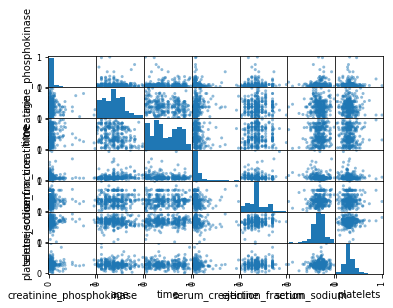

In [7]:

# Plot the data.
scatter_m = scatter_matrix(ex_df_kmeans)
plt.show()



#### Task 7


##### Let's first start with an arbitrary `k = 2`
##### Initialize the K-means with 2 clusters and name it `ex_kmeans_default`. 
##### Fit `ex_kmeans_default` with `ex_df_kmeans`. 
##### Predict the clusters with `ex_kmeans_default` and name the outputs as `ex_labels`. 
##### Get the cluster centers and name it as `ex_C_default`. 
##### Print `ex_C_default` to see what it looks like. 


#### Result:


In [8]:

# K-means - start with 2 clusters.
# Initializing K-means.
ex_kmeans_default = KMeans(n_clusters=2)
# Fitting with inputs.
ex_kmeans_default = ex_kmeans_default.fit(ex_df_kmeans)
# Predicting the clusters.
ex_labels = ex_kmeans_default.predict(ex_df_kmeans)
# Getting the cluster centers.
ex_C_default = ex_kmeans_default.cluster_centers_
print(ex_C_default)



[[0.06853478 0.33370354 0.72513651 0.08671413 0.36756882 0.68091603
  0.28850668]
 [0.07345396 0.41396104 0.23426114 0.11113563 0.36282468 0.67040816
  0.28908678]]


#### Task 8


##### Plot the data with clusters colored in and each centroid plotted.


#### Result:


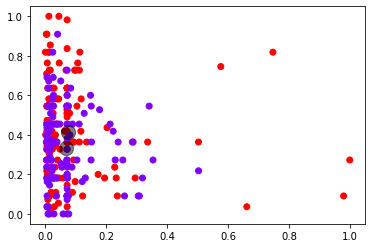

In [9]:

# First, we plot our clusters, colored in by the labels.
plt.scatter(ex_df_kmeans.iloc[:,0],
            ex_df_kmeans.iloc[:,1],
            c=ex_kmeans_default.labels_,
            cmap='rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(ex_C_default[:, 0],
            ex_C_default[:, 1],
            c='black',
            s=200,
            alpha=0.5)


#### Please refer to module 3 of IntroToClustering - KMeans for Tasks 9-16
#### Task 9
##### Get the metrics we need for building an elbow plot, namely `ex_tot_withinss`, `ex_totss` and `ex_betweenss`.
##### The range for ex_K should be from 1 to 10.  


#### Result:


In [10]:

# Set the range of k.
ex_K_MAX = 10
ex_KK = range(1,ex_K_MAX+1)

# Run `kmeans` for values in the range k = 1-10.
ex_KM = [kmeans(ex_df_kmeans,k) for k in ex_KK ]

# Find the centroids for each KM output. 
ex_centroids = [cent for (cent,var) in ex_KM]

# Calculate centroids for each iteration of k. 
ex_D_k = [cdist(ex_df_kmeans, cent, 'euclidean') for cent in ex_centroids]
ex_cIdx = [np.argmin(D,axis=1) for D in ex_D_k]
ex_dist = [np.min(D,axis=1) for D in ex_D_k]

ex_tot_withinss = [sum(d**2) for d in ex_dist]              # Total within-cluster sum of squares
ex_totss = sum(pdist(ex_df_kmeans)**2)/ex_df_kmeans.shape[0]   # The total sum of squares
ex_betweenss = ex_totss - ex_tot_withinss                      # The between-cluster sum of squares



#### Task 10


##### Build an elbow curve plot for KMeans clustering.
##### Observe the plot to try to identify the optimal K.


#### Result:


Text(0.5, 1.0, 'Elbow for KMeans clustering')

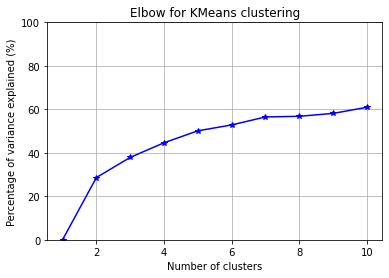

In [11]:

clr = cm.Spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# Elbow curve - explained variance.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ex_KK, ex_betweenss/ex_totss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')



#### Task 11


##### Using the `KneeLocator` package, find the knee point `ex_elbow_cluster`


#### Result:


3


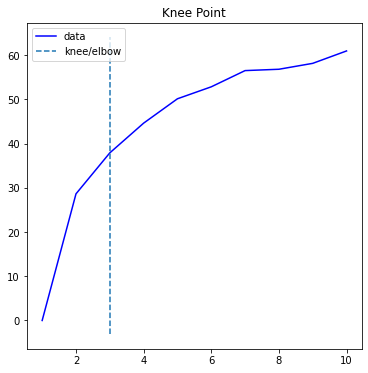

In [12]:
 # Find the knee point in the curve.
ex_kl = KneeLocator(x = ex_KK, y = ex_betweenss/ex_totss*100,
                 curve='concave', 
                 direction='increasing', 
                 S=1)
                
ex_kl.plot_knee()
ex_elbow_cluster = ex_kl.knee
print(ex_elbow_cluster)



#### Task 12


##### Now try the silhouette method to find the optimal number of `k` and name it `ex_sil_cluster`.


#### Result:


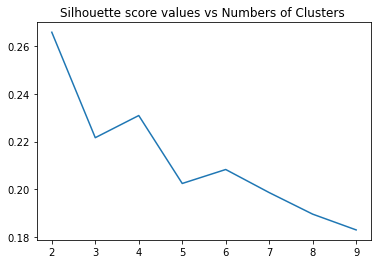

Optimal number of components is: 2


In [13]:

obs = ex_df_kmeans
ex_silhouette_score_values=list()
 
ex_NumberOfClusters = range(2,ex_K_MAX)
 
for i in ex_NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, 
                              max_iter=300, 
                              tol=0.0001, 
                              verbose=0, 
                              random_state=None, 
                              copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None)
    ex_silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
 
plt.plot(ex_NumberOfClusters, ex_silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()     
 
ex_sil_cluster=ex_NumberOfClusters[ex_silhouette_score_values.index(max(ex_silhouette_score_values))]


print("Optimal number of components is:", ex_sil_cluster)



#### Task 12


##### Print the explained variance for both k = 2 and the optimal k and compare.


#### Result:


In [14]:

# Explained variance for default number of clusters.
print(ex_betweenss[2 - 1]/ex_totss * 100)

# Explained variance for optimal number of clusters.
print(ex_betweenss[ex_sil_cluster - 1]/ex_totss * 100)




28.6312302965303
28.6312302965303


#### Task 13


##### Use the larger of the optimum k from the elbow plot and the silhouette plot to be `ex_optimal_clusters`
##### Initiate a new K-means cluster classifier and name it `ex_kmeans_optimal`, with K being the optimal number of clusters.
##### Fit `ex_kmeans_optimal` and use the model to predict clusters and store them in a list called `ex_labels`. 


#### Result:


In [15]:
# Setting optimal number of clusters.
ex_optimal_clusters = max(ex_elbow_cluster, ex_sil_cluster)
# Initializing K-means.
ex_kmeans_optimal = KMeans(n_clusters = ex_optimal_clusters)
# Fitting with inputs.
ex_kmeans_optimal = ex_kmeans_optimal.fit(ex_df_kmeans)
# Predicting the clusters.
ex_labels = ex_kmeans_optimal.predict(ex_df_kmeans)
# Getting the cluster centers.
ex_C_optimal = ex_kmeans_optimal.cluster_centers_



#### Task 14


##### Plot a scatter plot with the optimal number of clusters shown in different colors.
##### Plot the optimized centroids over the clusters.


#### Result:


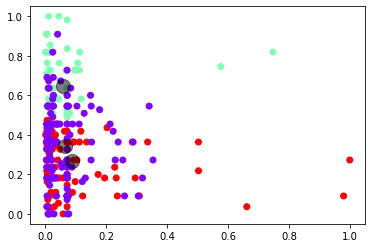

In [16]:

# First we plot our clusters, colored in by the labels.
plt.scatter(ex_df_kmeans.iloc[:,0],            
            ex_df_kmeans.iloc[:,1], 
            c = ex_kmeans_optimal.labels_, 
            cmap = 'rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(ex_C_optimal[:, 0], 
            ex_C_optimal[:, 1], 
            c = 'black', 
            s = 200, 
            alpha = 0.5)



#### Task 15


##### Create a new dataframe named `ex_clustered_df` and populate with all the columns from `ex_cluster_scaled`. 
##### Append the list of predicted cluster, `ex_labels`, to the `ex_clustered_df` dataframe. 
##### Print the `ex_clustered_df` dataframe to inspect the clusters.


#### Result:


In [17]:

# Append the other variables back to the dataframe with clusters.
ex_clustered_df = ex_df_cluster 
# Add cluster numbers.
ex_clustered_df['clusters'] = pd.Series(ex_labels)

# Inspect clusters.
print(ex_clustered_df.head())



   creatinine_phosphokinase   age  time  serum_creatinine  ejection_fraction  \
0                       582  75.0     4               1.9                 20   
1                      7861  55.0     6               1.1                 38   
2                       146  65.0     7               1.3                 20   
3                       111  50.0     7               1.9                 20   
4                       160  65.0     8               2.7                 20   

   serum_sodium  platelets  clusters  
0           130  265000.00         1  
1           136  263358.03         2  
2           129  162000.00         1  
3           137  210000.00         2  
4           116  327000.00         1  


#### Task 16


##### Group the `ex_clustered_df` dataframe by `cluster` to see the group mean of each variable.
##### Name the new dataframe as `ex_cluster_groups_means`. 
##### Print `ex_cluster_groups_means` to inspect each clusters.


#### Result:


In [18]:

# Group by `clusters` column to see the group mean of each variable.
ex_cluster_groups_means = ex_clustered_df.groupby('clusters').mean()
print(ex_cluster_groups_means)


          creatinine_phosphokinase        age        time  serum_creatinine  \
clusters                                                                      
0                       528.508065  59.026887  211.451613          1.288710   
1                       481.758065  75.548387   54.612903          1.709677   
2                       695.274336  54.743363   82.672566          1.336018   

          ejection_fraction  serum_sodium      platelets  
clusters                                                  
0                 38.241935    136.733871  263905.824758  
1                 37.403226    135.532258  267051.972097  
2                 38.283186    137.106195  260730.143451  


#### Please refer to module 4 of IntroToClustering - KMeans for Tasks 17-18
#### Task 17
##### Now use Mini-Batch K-Means algorithm on the same `ex_df_kmeans` data.
##### Set `n_cluster` to 2, and `batch_size` to one third of total rows. (Make sure it's an integer) 


#### Result:


In [19]:

ex_batch_size = int(len(ex_df_kmeans)/3)

ex_mbkm = MiniBatchKMeans(n_clusters=2, batch_size=ex_batch_size)
# Fitting with inputs.
ex_mbkm = ex_mbkm.fit(ex_df_kmeans)
# Predicting the clusters.
ex_mbkm_labels = ex_mbkm.predict(ex_df_kmeans)
# Getting the cluster centers.
ex_mbkm_C = ex_mbkm.cluster_centers_
print(ex_mbkm_C)



[[0.0664163  0.32925003 0.71481033 0.08923221 0.37156136 0.68981763
  0.28449174]
 [0.06658656 0.42048368 0.23588489 0.10526145 0.3712364  0.67005495
  0.29512167]]


C:\Users\624768\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


#### Task 18


##### Plot the Mini-Batch K-means cluster and the centroids.


#### Result:


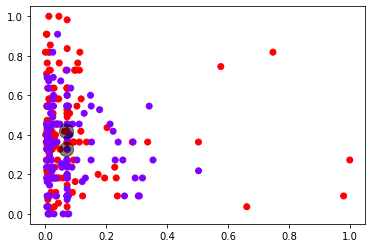

In [20]:

plt.scatter(ex_df_kmeans.iloc[:,0], ex_df_kmeans.iloc[:,1], c=ex_mbkm.labels_, cmap='rainbow')
# Second, we plot the optimized centroids over the clusters.
plt.scatter(ex_mbkm_C[:, 0], ex_mbkm_C[:, 1], c='black', s=200, alpha=0.5)



#### Bonus Task 1


##### Try to plot both algorithms on the same plot and plot their differences.
##### Make necessary changes.
##### Use the following colors: ['#4EACC5', '#FF9C34','#c5674e', '#4E9A06']


#### Result:


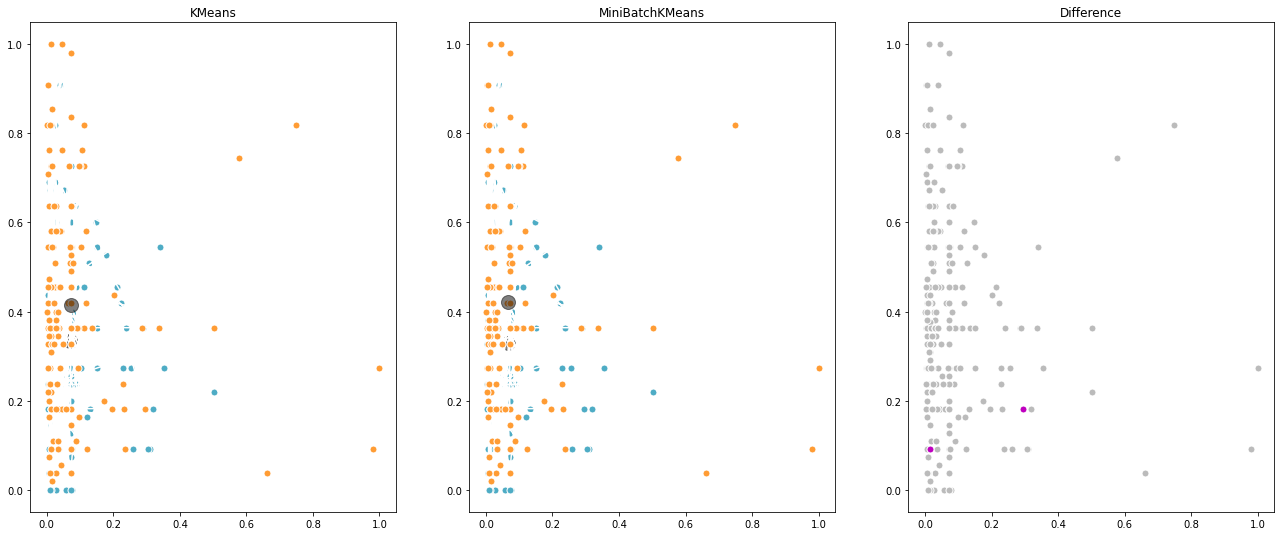

In [21]:

from sklearn.metrics.pairwise import pairwise_distances_argmin

n_clusters = 2
X = np.array(ex_df_kmeans)
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34','#c5674e', '#4E9A06']

ex_k_means_cluster_centers = ex_kmeans_default.cluster_centers_
order = pairwise_distances_argmin(ex_kmeans_default.cluster_centers_, ex_mbkm.cluster_centers_)
ex_mbkm_cluster_centers = ex_mbkm.cluster_centers_[order]

ex_k_means_labels = pairwise_distances_argmin(ex_df_kmeans, ex_k_means_cluster_centers)
ex_mbkm_labels = pairwise_distances_argmin(ex_df_kmeans, ex_mbkm_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = ex_k_means_labels == k
    cluster_center = ex_k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.',markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k', alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('KMeans')

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = ex_mbkm_labels == k
    cluster_center = ex_mbkm_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize=14)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='k',alpha=0.5,
            markeredgecolor='k', markersize=14)
ax.set_title('MiniBatchKMeans')

# Initialise the different array to all False
different = (ex_mbkm_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((ex_k_means_labels == k) != (ex_mbkm_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.',markersize=14)
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.',markersize=14)
ax.set_title('Difference')

plt.show()



